In [1]:
import PyHEADTAIL
from PyHEADTAIL.particles import generators
from PyHEADTAIL.general.printers import SilentPrinter
from PyHEADTAIL.trackers.longitudinal_tracking import RFSystems
from PyHEADTAIL.trackers.transverse_tracking import TransverseMap
from PyHEADTAIL.monitors.monitors import BunchMonitor, ParticleMonitor
from SOLEILII_parameters.SOLEILII_TDR_parameters import *
from PyHEADTAIL.particles import particles
from scipy.constants import m_p
from matplotlib import pyplot as plt
import seaborn as sbs
import numpy as np
N_MACROPARTICLES = int(1e3)
N_TURNS = int(10)
H_RF = 416
N_SEGMENTS = int(10)
np.random.seed(42)
PHI_RF = np.arccos(U_LOSS/V_RF) if (GAMMA**-2-GAMMA_T**-2) < 0 else pi+np.arccos(U_LOSS/V_RF)
PHI_RF=0
long_map = RFSystems(
    CIRCUMFERENCE,
    [H_RF],
    [V_RF],
    [PHI_RF],
    [ALPHA_0],
    GAMMA,
    mass=m_e,
    charge=e
    )

PyHEADTAIL v1.14.1.62
(dirty git work tree)




In [14]:
n_gaps = 50
np.random.seed(42)
#Preparing custom electron bunch train
x_array = np.zeros(shape=(H_RF,))
xp_array = np.zeros(shape=(H_RF,))
y_array = np.zeros(shape=(H_RF,))
yp_array = np.zeros(shape=(H_RF,))
dp_array = np.zeros(shape=(H_RF,))
z_array = np.linspace(0, CIRCUMFERENCE-CIRCUMFERENCE/H_RF, H_RF)

electron_bunch_list = []
monitor_list = []
r_x = 2*np.sqrt(EPSILON_X*BETA_X_SMOOTH)
r_xp = 2*np.sqrt(EPSILON_X*BETA_X_SMOOTH)
r_y = 2*np.sqrt(EPSILON_Y*BETA_Y_SMOOTH)
r_yp = 2*np.sqrt(EPSILON_Y*BETA_Y_SMOOTH)  
for ind, h in enumerate(range(H_RF)):
    np.random.seed(42)
    electron_bunch = generators.ParticleGenerator(macroparticlenumber=N_MACROPARTICLES//2,
                                                  intensity=INTENSITY_PER_BUNCH//2,
                                                  charge=e, gamma=GAMMA, mass=m_e,
                                                  circumference=CIRCUMFERENCE,
                                                  # distribution_x=generators.kv2D(r_x, r_xp),
                                                  distribution_x = generators.gaussian2D(EPSILON_X),
                                                  alpha_x=ALPHA_X_SMOOTH, beta_x=BETA_X_SMOOTH,
                                                  # distribution_y=generators.kv2D(r_y, r_yp),
                                                  distribution_y = generators.gaussian2D(EPSILON_Y),
                                                  alpha_y=ALPHA_Y_SMOOTH, beta_y=BETA_Y_SMOOTH,
                                                  distribution_z=generators.gaussian2D_asymmetrical(SIGMA_Z, SIGMA_DP),
                                                  printer=SilentPrinter()
                                 ).generate()
    electron_bunch_twin = particles.Particles(macroparticlenumber=N_MACROPARTICLES//2,
                                                  particlenumber_per_mp=INTENSITY_PER_BUNCH/N_MACROPARTICLES,
                                                  charge=e, gamma=GAMMA, mass=m_e,
                                                  circumference=CIRCUMFERENCE,
                                                  coords_n_momenta_dict={
                                                    'x': -electron_bunch.x,
                                                    'xp': -electron_bunch.xp,
                                                    'y': -electron_bunch.y,
                                                    'yp': -electron_bunch.yp,
                                                    'z': -electron_bunch.z,
                                                    'dp': -electron_bunch.dp
                                                  },
                                                  printer=SilentPrinter()
                                     )

    electron_bunch += electron_bunch_twin
    np.random.seed(ind)
    electron_bunch.y += np.random.normal(scale=0.02*electron_bunch.sigma_y(), size=1)
    filename = 'Results/BM_n={0:}'.format(int(h))
    bunch_monitor = BunchMonitor(filename, n_steps=N_SEGMENTS*N_TURNS, parameters_dict=None)
    electron_bunch.z += h*CIRCUMFERENCE/H_RF
    electron_bunch_list.append(electron_bunch)
    monitor_list.append(bunch_monitor)
for i in range(n_gaps):
    electron_bunch_list[-i].intensity = 0
    # electron_bunch_list[104+i].intensity = 0
    # electron_bunch_list[208+i].intensity = 0
    # electron_bunch_list[312+i].intensity = 0
print(electron_bunch_list[0].sigma_x())

2.1107186384631476e-05


In [3]:
# import seaborn as sbs
# from aps_figures import aps_one_column
# fig, ax = plt.subplots(1, 1)
# cm = sbs.color_palette("coolwarm", as_cmap=True)
# electron_bunch = electron_bunch_list[0]
# print(electron_bunch.sigma_z())
# print(max(electron_bunch.z))
# ax.scatter(electron_bunch.z/electron_bunch.sigma_z(),
#            electron_bunch.dp/electron_bunch.sigma_dp(),
#            # c=electron_bunch.dp/electron_bunch.sigma_dp(),
#            alpha=0.5,
#            # cmap=cm
#           )
# # ax.title.set_text('Initial distribution')
# ax.set_xlabel('Longitudinal position, $z/\sigma_z$')
# ax.set_ylabel('Energy deviation, $\delta/\sigma_\delta$')
# ax.set_xlim(-4, 4)
# ax.set_ylim(-4, 4)
# plt.savefig('/home/gubaidulin/Documents/Presentations/head-tail-illustration.svg')

In [4]:
# from tqdm.notebook import tqdm
# from PyHEADTAIL.trackers.detuners import Chromaticity
# s = np.arange(0, N_SEGMENTS + 1) * CIRCUMFERENCE / N_SEGMENTS
# alpha_x, alpha_y = ALPHA_X_SMOOTH * \
#     np.ones(N_SEGMENTS), ALPHA_Y_SMOOTH * np.ones(N_SEGMENTS)
# beta_x, beta_y = BETA_X_SMOOTH * \
#     np.ones(N_SEGMENTS), BETA_Y_SMOOTH * np.ones(N_SEGMENTS)
# D_x, D_y = np.zeros(N_SEGMENTS),  np.zeros(N_SEGMENTS)
# chromaticity=1
# chroma = Chromaticity(Qp_x=[chromaticity*Q_X], Qp_y=[chromaticity*Q_Y])
# trans_map = TransverseMap(s, alpha_x, beta_x, D_x,
#                           alpha_y, beta_y, D_y, Q_X, Q_Y, [chroma])
# trans_one_turn = [m for m in trans_map]
# n_turns = 5000
# for turn in tqdm(range(n_turns)):
#         for m in trans_one_turn:
#             m.track(electron_bunch)
#         long_map.track(electron_bunch)

In [5]:
# fig, ax = plt.subplots(1, 1)
# cm = sbs.color_palette("coolwarm", as_cmap=True)
# electron_bunch = electron_bunch_list[0]
# print(electron_bunch.sigma_z())
# print(max(electron_bunch.z))
# ax.scatter(electron_bunch.z/electron_bunch.sigma_z(),
#            electron_bunch.x/electron_bunch.sigma_x(),
#            c=electron_bunch.dp/electron_bunch.sigma_dp(),
#            alpha=0.5, 
#            cmap=cm)
# ax.title.set_text('Final distribution')
# ax.set_xlabel('Longitudinal position, $z/\sigma_z$')
# ax.set_ylabel('Transverse position, $x/\sigma_x$')
# ax.set_xlim(-4, 4)
# ax.set_ylim(-4, 4)

In [6]:
# fig, ax = plt.subplots(2, 2)
# @np.vectorize
# def uniform_dist(x):
#     if x < 3 and x > -3:
#         return 1
#     else:
#         return 0
# def gauss_dist(x):
#     return np.exp(-x**2/(2))

# x = np.linspace(-4, 4, 1000)
# ax[0,0].plot(x, gauss_dist(x))
# ax[0,1].plot(x, uniform_dist(x))
# ax[1,0].plot(x, uniform_dist(x))
# ax[1,1].plot(x, gauss_dist(x))
# for ax0 in (ax[0,0], ax[0,1], ax[1,0], ax[1,1]):
#     ax0.set_ylim(0, 1.1)
#     ax0.set_xlim(-4, 4)
# ax[0,0].title.set_text('DC EL')
# ax[0,1].title.set_text('PEL')
# # ax[1,0].title.set_text('PEL Transverse')
# # ax[1,1].title.set_text('PEL Longitudinal')
# ax[0,0].set_xlabel('Transverse position, $x/\sigma_x$')
# ax[0,1].set_xlabel('Transverse position, $x/\sigma_x$')

# ax[1,0].set_xlabel('Longitudinal position, $z/\sigma_z$')
# ax[1,1].set_xlabel('Longitudinal position, $z/\sigma_z$')

# ax[1,0].set_ylabel('e-beam current')
# ax[0,0].set_ylabel('Prob. density')

# plt.tight_layout()
# plt.savefig('/home/gubaidulin/Documents/Presentations/DCvsPEL.pdf')

In [7]:
# fig, axlist = plt.subplots(1, 2)
# axlist[0].scatter(electron_bunch_list[0].x/electron_bunch_list[0].sigma_x(), electron_bunch_list[0].xp/electron_bunch_list[0].sigma_xp(), alpha=0.5) 
# axlist[0].axvline(2)
# axlist[0].axhline(2)

# print(np.max(electron_bunch_list[0].x)/electron_bunch_list[0].sigma_x())
# print(np.max(electron_bunch_list[0].y))

# axlist[1].hist(electron_bunch_list[0].x/electron_bunch_list[0].sigma_x(), bins=25)
# for ax in axlist:
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(True)
#     ax.spines['left'].set_visible(True)

In [8]:
s = np.arange(0, N_SEGMENTS + 1) * CIRCUMFERENCE / N_SEGMENTS
alpha_x, alpha_y = ALPHA_X_SMOOTH * \
    np.ones(N_SEGMENTS), ALPHA_Y_SMOOTH * np.ones(N_SEGMENTS)
beta_x, beta_y = BETA_X_SMOOTH * \
    np.ones(N_SEGMENTS), BETA_Y_SMOOTH * np.ones(N_SEGMENTS)
D_x, D_y = np.zeros(N_SEGMENTS),  np.zeros(N_SEGMENTS)
trans_map = TransverseMap(s, alpha_x, beta_x, D_x,
                              alpha_y, beta_y, D_y, Q_X, Q_Y)

In [15]:
from PyHEADTAIL.ion_cloud.ion_cloud import BeamIonElement
from tqdm.notebook import tqdm
trans_one_turn = [m for m in trans_map]
BI = BeamIonElement()
beam_ion_elements = []
particle_monitor = True
set_aperture = True
n_macroparticles = int(1e4)
n_steps = int(H_RF*N_TURNS)
for ind, m in enumerate(trans_one_turn):
    if ind == 0:
            beam_ion_elements.append(BeamIonElement(dist_ions='GS',
                                                    monitor_name='Results/IPM(ind={0:})'.format(int(ind)),
                                                    use_particle_monitor=particle_monitor,
                                                    set_aperture=set_aperture,
                                                    n_macroparticles_max=n_macroparticles,
                                                    n_steps=n_steps,
                                                    n_segments=N_SEGMENTS,
                                                    ring_circumference=CIRCUMFERENCE,
                                                   interaction_model='weak-weak'))
    beam_ion_elements.append(BeamIonElement(dist_ions='GS',
                                            monitor_name='Results/IM(ind={0:})'.format(int(ind)),
                                            set_aperture=set_aperture,
                                            n_macroparticles_max=n_macroparticles,
                                            n_steps=n_steps,
                                            n_segments=N_SEGMENTS,
                                            ring_circumference=CIRCUMFERENCE,
                                           interaction_model='weak-weak'))
trans_one_turn = [item for sublist in zip(trans_one_turn, beam_ion_elements) for item in sublist]
print('First 5 elements of a transverse map: ')
for item in trans_one_turn[:5]:
    print(item) 
for turn in tqdm(range(N_TURNS)):
    for index, m_ in enumerate((trans_one_turn)):
        for bunch_index, electron_bunch in enumerate(electron_bunch_list):
            m_.track(electron_bunch_list[bunch_index])    
            long_map.track(electron_bunch_list[bunch_index])
            if index % 2 == 0:
                monitor_list[bunch_index].dump(electron_bunch_list[bunch_index])
            # if electron_bunch_list[bunch_index].intensity < 1e3 and (index+1) % 2 == 0:
                # m_.clear_ions()


Results/IPM(ind=0)
First 5 elements of a transverse map: 


  0%|          | 0/10 [00:00<?, ?it/s]

2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05
2.2e-05


1.00e-05


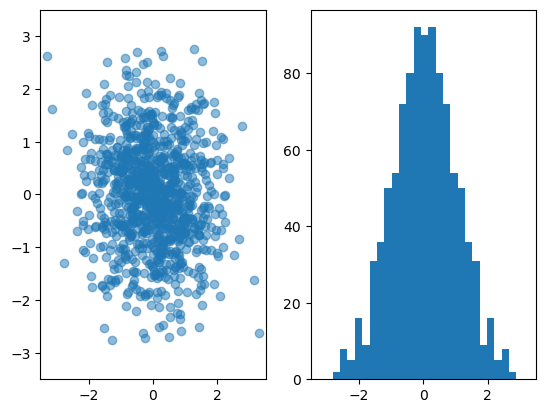

In [10]:
fig, axlist = plt.subplots(1, 2)
axlist[0].scatter(electron_bunch_list[400].x/electron_bunch_list[400].sigma_x(), electron_bunch_list[400].xp/electron_bunch_list[400].sigma_xp(), alpha=0.5) 
# axlist[0].axvline(2*electron_bunch.sigma_x())
# axlist[0].axvline(electron_bunch.sigma_x())
axlist[0].set_ylim(-3.5, 3.5)
print('{:.2e}'.format(electron_bunch_list[0].sigma_y()))
axlist[1].hist(electron_bunch_list[0].y/electron_bunch_list[0].sigma_y(), bins=25)
for ax in axlist:
    ax.set_xlim(-3.5, 3.5)

Ion cloud intensity 1.7e+03


/home/gubaidulin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


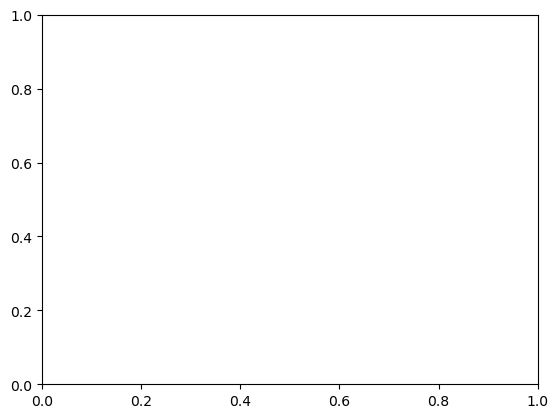

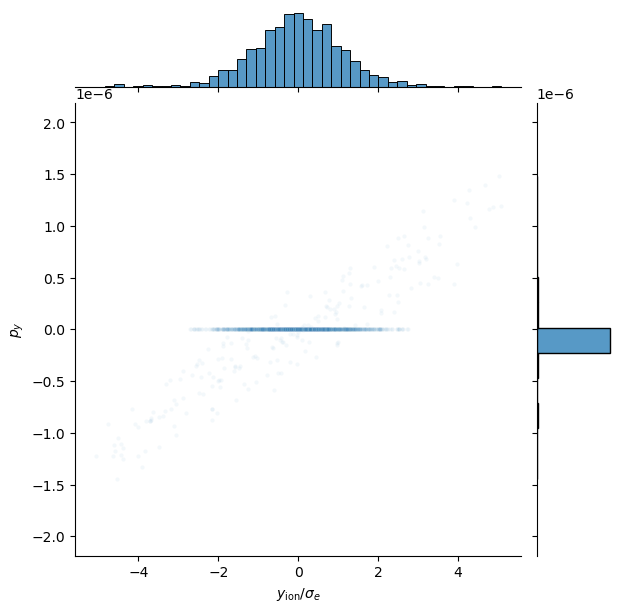

In [11]:
ion_cloud = trans_one_turn[1].get_ion_beam()
fig, ax = plt.subplots(1, 1)
ax = sbs.jointplot(ion_cloud.y/electron_bunch.sigma_y(), ion_cloud.yp, marker='.', alpha=0.05)
ax.ax_joint.set_xlabel('$y$')
ax.ax_joint.set_ylabel('$p_y$')
ax.ax_joint.set_xlabel('$y_\mathrm{ion}/\sigma_e$')
ax.ax_joint.set_ylim(-10*ion_cloud.sigma_yp(), 10*ion_cloud.sigma_yp())
print('Ion cloud intensity {:.1e}'.format(ion_cloud.intensity))

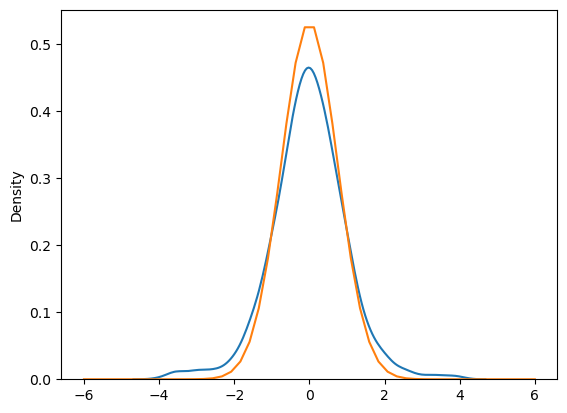

In [12]:
from scipy.special import k0
fig, ax  = plt.subplots(1, 1)
ion_cloud = trans_one_turn[1].get_ion_beam()
ax = sbs.kdeplot(ion_cloud.y/ion_cloud.sigma_y())
sig = .75
x = np.linspace(-6, 6)
y = 1/np.sqrt(2*pi*sig**2)*np.exp(-x**2/2/sig**2)
ax.plot(x, y)
# r = np.linspace(min(ion_cloud.y), max(ion_cloud.y), 100)
# # ax.plot(r, get_n_i(r, 2*ion_cloud.sigma_y())/2.5e6)
# x = np.linspace(min(ion_cloud.y), max(ion_cloud.y), 100)
# # ax.plot(x, get_dist(x, electron_bunch.sigma_y()))